# Split data -> csv

In [1]:
import pandas as pd

df = pd.read_parquet('train-00000-of-00001.parquet')

print(df.head(3))

  id                                        translation
0  0  {'en': 'Source: Project GutenbergAudiobook ava...
1  1  {'en': 'Pride and Prejudice', 'hu': 'Büszkeség...
2  2         {'en': 'Jane Austen', 'hu': 'Jane Austen'}


In [2]:
df.iloc[0,1]['en']

'Source: Project GutenbergAudiobook available here'

In [3]:
df[['en', 'hu']] = df.apply(lambda x: pd.Series([x.iloc[1]['en'], x.iloc[1]['hu']]), axis=1)

In [4]:
df.drop(columns=['translation'], inplace=True)

In [5]:
df.head()

,id,en,hu
0,0,Source: Project GutenbergAudiobook available here,Source: mek.oszk.huTranslation: Szenczi Miklós...
1,1,Pride and Prejudice,Büszkeség és balítélet
2,2,Jane Austen,Jane Austen
3,3,Chapter 1,I. KÖNYV 1. FEJEZET
4,4,"It is a truth universally acknowledged, that a...","Általánosan elismert igazság, hogy a legényemb..."


In [6]:
from sklearn.model_selection import train_test_split

# df là dataframe chứa dữ liệu của bạn

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

# In kích thước của tập huấn luyện và tập kiểm tra
print("Kích thước tập huấn luyện:", len(train_df))
print("Kích thước tập kiểm tra:", len(test_df))

Kích thước tập huấn luyện: 123435
Kích thước tập kiểm tra: 13716


In [7]:
train_df.to_csv('train_data.csv', index = False)
test_df.to_csv('test_data.csv', index = False)

# Analysis train_data

In [38]:
train_df = pd.read_csv('train_data.csv')
train_df.head(3)

,id,en,hu
0,69221,"""I do not like to go there.",- Nem akarok odamenni.
1,130383,"But, though my means will not admit of my expe...","Jóllehet anyagiakban nem lehetek oly bőkezű, m..."
2,119608,"""Two cables lengths at the most.""",Legföljebb két kötélhossznyira.


In [12]:
import nltk
import matplotlib.pyplot as plt

# Giả sử df là DataFrame chứa dữ liệu dịch máy, với các cột 'id', 'en', 'hu'

# Tải tài nguyên cần thiết của nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lemin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

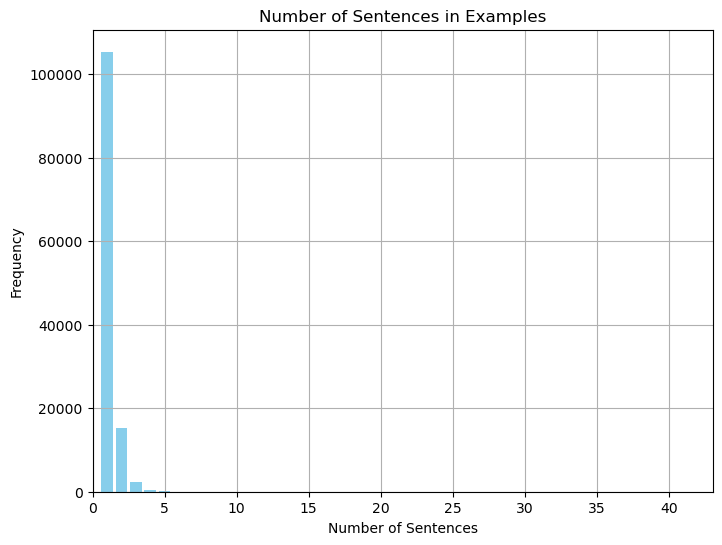

In [46]:
train_df['num_sentences_en'] = train_df['en'].apply(lambda x: len(nltk.sent_tokenize(x)))
plt.figure(figsize=(8, 6))
plt.bar(train_df['num_sentences_en'].value_counts().index, train_df['num_sentences_en'].value_counts().values, color='skyblue')
plt.title('Number of Sentences in Examples')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.xlim(0, train_df['num_sentences_en'].max()) 
plt.grid(True)
plt.show()

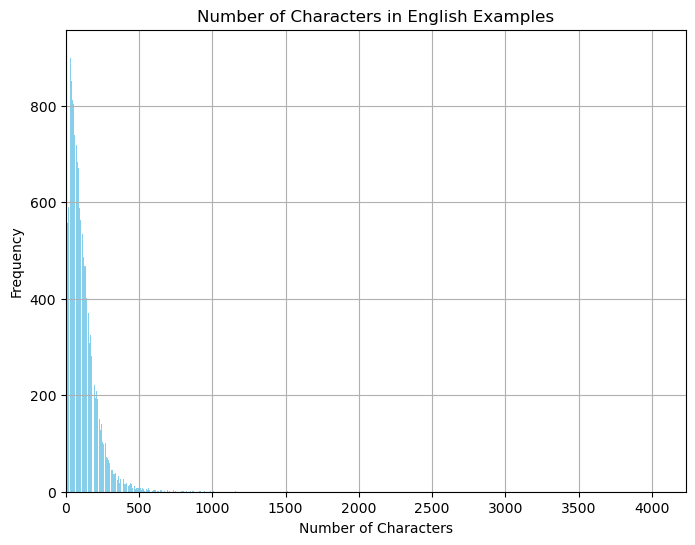

In [47]:
train_df['num_characters_en'] = train_df['en'].apply(len)
plt.figure(figsize=(8, 6))
plt.bar(train_df['num_characters_en'].value_counts().index, train_df['num_characters_en'].value_counts().values, color='skyblue')
plt.title('Number of Characters in English Examples')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.xlim(0, train_df['num_characters_en'].max()) 
plt.grid(True)
plt.show()

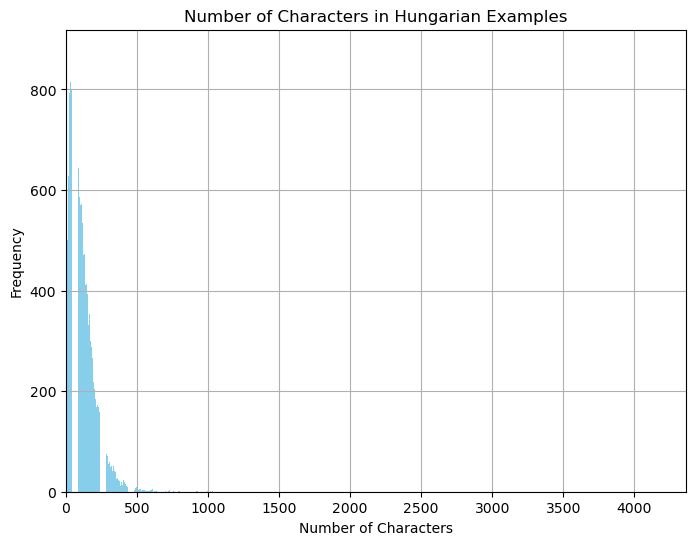

In [48]:
train_df['num_characters_hu'] = train_df['hu'].apply(len)
plt.figure(figsize=(8, 6))
plt.bar(train_df['num_characters_hu'].value_counts().index, train_df['num_characters_hu'].value_counts().values, color='skyblue')
plt.title('Number of Characters in Hungarian Examples')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.xlim(0, train_df['num_characters_hu'].max()) 
plt.grid(True)
plt.show()

# Analysis test_data

In [49]:
test_df = pd.read_csv('test_data.csv')
test_df.head(3)

,id,en,hu
0,33115,"On the expiration of its first week, Mr. Pickw...",Egy héttel később Pickwick úr és barátai vissz...
1,90588,The painful memories became more and more cove...,A nyomasztó visszaemlékezéseket mind jobban és...
2,79511,"But if no one punished the first Judas, if no ...","De ha az elsőt senki sem büntette meg, ha senk..."


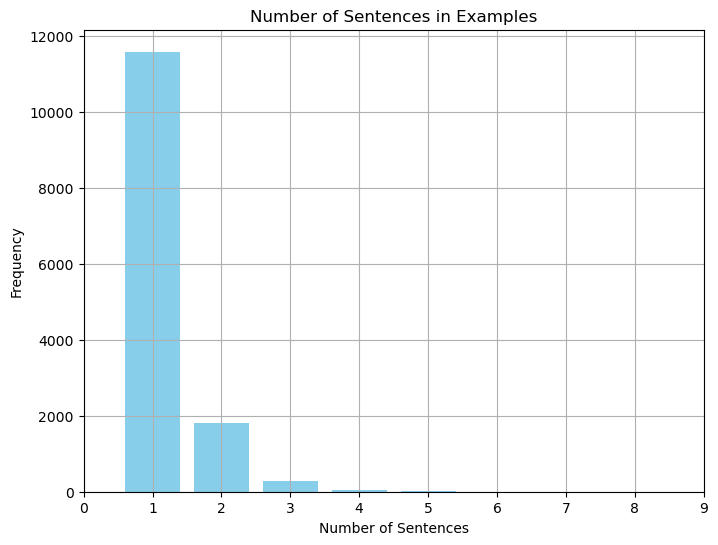

In [50]:
test_df['num_sentences_en'] = test_df['en'].apply(lambda x: len(nltk.sent_tokenize(x)))
plt.figure(figsize=(8, 6))
plt.bar(test_df['num_sentences_en'].value_counts().index, test_df['num_sentences_en'].value_counts().values, color='skyblue')
plt.title('Number of Sentences in Examples')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.xlim(0, test_df['num_sentences_en'].max()) 
plt.grid(True)
plt.show()

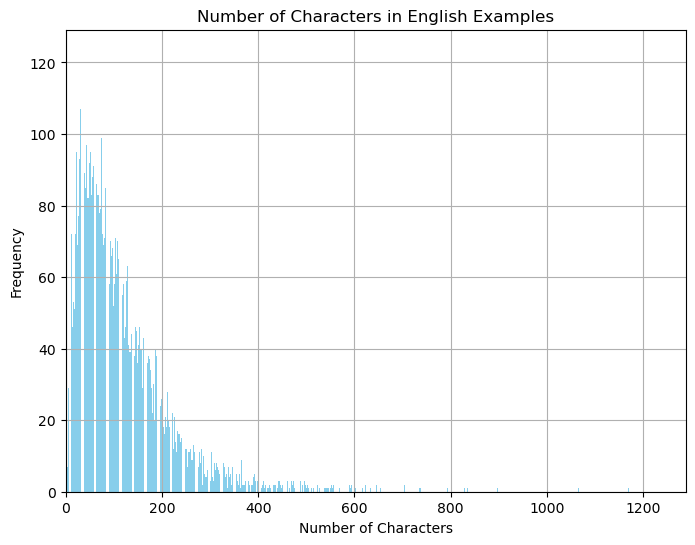

In [51]:
test_df['num_characters_en'] = test_df['en'].apply(len)
plt.figure(figsize=(8, 6))
plt.bar(test_df['num_characters_en'].value_counts().index, test_df['num_characters_en'].value_counts().values, color='skyblue')
plt.title('Number of Characters in English Examples')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.xlim(0, test_df['num_characters_en'].max()) 
plt.grid(True)
plt.show()

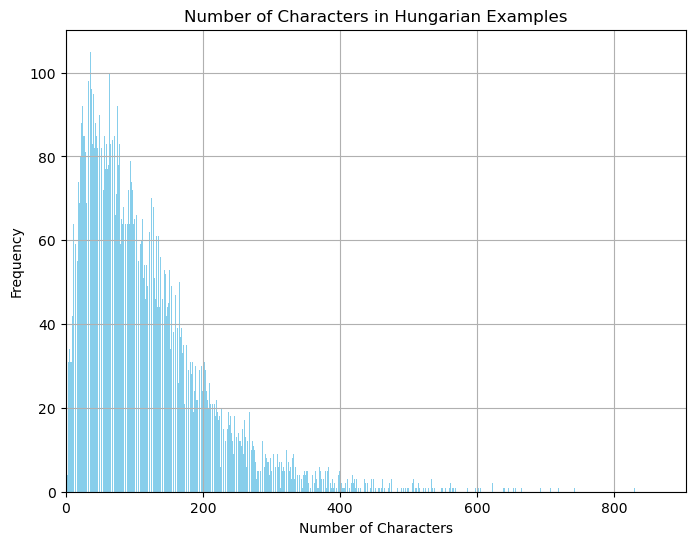

In [52]:
test_df['num_characters_hu'] = test_df['hu'].apply(len)
plt.figure(figsize=(8, 6))
plt.bar(test_df['num_characters_hu'].value_counts().index, test_df['num_characters_hu'].value_counts().values, color='skyblue')
plt.title('Number of Characters in Hungarian Examples')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.xlim(0, test_df['num_characters_hu'].max()) 
plt.grid(True)
plt.show()

# Conclusion

Ta thấy trong đa số các ví dụ ở cả train và test data, số lượng câu đa số đều <= 5. Số lượng kí tự chủ yếu nằm trong khoảng (0, 1000).  
Tuy nhiên, vẫn có những ví dụ có số lượng câu lên đén hơn 40 và số lượng kí tự lên đến hơn 4000